In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

import seaborn as sns

# 로지스틱 회귀
from statsmodels.api import Logit

from xgboost import plot_importance
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
# 평가 함수
from sklearn.metrics import accuracy_score

# confusion matrix
from sklearn.metrics import confusion_matrix

matplotlib.rc("font", family = "Malgun Gothic")

In [2]:
df_raw = pd.read_csv("Telemarketing_Data_cl2.csv", encoding='utf-8-sig' )
df_raw.head()

,연령,age_group,직업군,economic_group,economic_group_dummy,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,success,연락일자,카드종류,card_category
0,56,5,주부,0,no,결혼,중졸,없음,없음,없음,유선전화,261,1,NaN,0,no,0,2018-01-03,87,life
1,57,5,서비스종사자,1,yes,결혼,전문학교,미확인,없음,없음,유선전화,149,1,NaN,0,no,0,2018-01-03,88,life
2,37,3,서비스종사자,1,yes,결혼,전문학교,없음,대출있음,없음,유선전화,226,1,NaN,0,no,0,2018-01-03,89,life
3,40,4,회사원,1,yes,결혼,검정고시,없음,없음,없음,유선전화,151,1,NaN,0,no,0,2018-01-03,90,life
4,56,5,서비스종사자,1,yes,결혼,전문학교,없음,없음,대출있음,유선전화,307,1,NaN,0,no,0,2018-01-03,91,life


In [3]:
# train_test_split(데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train, df_test = train_test_split(df_raw, # 데이터
                                     test_size = 0.3, #test 데이터의 비율
                                     random_state = 1234) # random state

print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (28831, 20)
test data size: (12357, 20)


In [4]:
# 목표변수와 설명변수의 상관계수
df_raw.corr(method = "pearson").round(3)

,연령,age_group,economic_group,통화시간,연락시도횟수,p_days,과거통화횟수,success,카드종류
연령,1.000,0.963,-0.205,-0.001,0.005,-0.070,0.024,0.030,-0.006
age_group,0.963,1.000,-0.192,-0.001,0.005,-0.061,0.023,0.031,-0.007
economic_group,-0.205,-0.192,1.000,-0.011,0.014,-0.004,-0.084,-0.100,-0.007
통화시간,-0.001,-0.001,-0.011,1.000,-0.072,0.077,0.021,0.405,-0.007
연락시도횟수,0.005,0.005,0.014,-0.072,1.000,0.046,-0.079,-0.066,0.010
p_days,-0.070,-0.061,-0.004,0.077,0.046,1.000,-0.040,-0.035,0.010
과거통화횟수,0.024,0.023,-0.084,0.021,-0.079,-0.040,1.000,0.230,-0.000
success,0.030,0.031,-0.100,0.405,-0.066,-0.035,0.230,1.000,0.003
카드종류,-0.006,-0.007,-0.007,-0.007,0.010,0.010,-0.000,0.003,1.000


In [5]:
df_raw.head(3)

,연령,age_group,직업군,economic_group,economic_group_dummy,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,success,연락일자,카드종류,card_category
0,56,5,주부,0,no,결혼,중졸,없음,없음,없음,유선전화,261,1,NaN,0,no,0,2018-01-03,87,life
1,57,5,서비스종사자,1,yes,결혼,전문학교,미확인,없음,없음,유선전화,149,1,NaN,0,no,0,2018-01-03,88,life
2,37,3,서비스종사자,1,yes,결혼,전문학교,없음,대출있음,없음,유선전화,226,1,NaN,0,no,0,2018-01-03,89,life


# 카드 종류 제외하고 분석
- 카드 종류를 넣어 버리면... 모델의 summary 값이 nan으로 발생

In [6]:
# 분석 대상 이벤트 = "1"
# 카드 종류 제외하고 분석
log_model = Logit.from_formula("""success ~ 연령 + C(economic_group_dummy) + C(결혼여부) + C(학력) + C(신용카드소지여부) +
                                    C(주택대출여부) + C(개인대출여부) + C(contact) + 통화시간 + 연락시도횟수 + 
                                     과거통화횟수 + C(card_category)""", df_train)

# 적합
log_result = log_model.fit(method='bfgs')
# 결과 출력
print(log_result.summary())

C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1735: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1788: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1735: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1788: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.256813
         Iterations: 35
         Function evaluations: 45
         Gradient evaluations: 39
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28801
Method:                           MLE   Df Model:                           29
Date:                Sat, 22 Feb 2020   Pseudo R-squ.:                  0.2697
Time:                        14:14:47   Log-Likelihood:                -7404.2
converged:                      False   LL-Null:                       -10139.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                   

### 예측

In [7]:
# test 데이터 예측
y_pred = log_result.predict(df_test)
# 0과 1의 값을 가진 class 변환
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

8992     0
8278     0
15815    0
26590    0
11866    0
dtype: int32

In [8]:
# 실제 test 데이터의 목표변수와 test 데이터의 예측값 비교
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["success"], y_pred_class)))
print("Confustion Matrix: \n{}".format(confusion_matrix(df_test["success"], y_pred_class)))

Accuracy: 0.898

Confustion Matrix: 
[[10740   220]
 [ 1043   354]]


### step 5 결론 도출 - 최종 회귀식


In [9]:
print(log_result.summary())


                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28801
Method:                           MLE   Df Model:                           29
Date:                Sat, 22 Feb 2020   Pseudo R-squ.:                  0.2697
Time:                        14:14:47   Log-Likelihood:                -7404.2
converged:                      False   LL-Null:                       -10139.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -3.2831      0.201    -16.339      0.000      -3.677      -2.889
C(economic_group_dummy)[T.yes]        -1.2871      0.060   

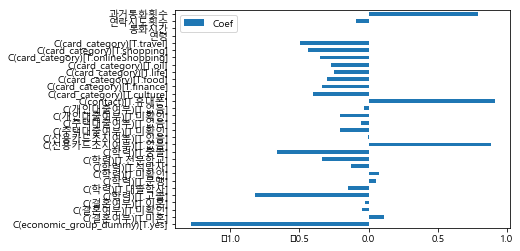

In [10]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")

In [11]:
df_logistic_coef

,Coef
C(economic_group_dummy)[T.yes],-1.287078
C(결혼여부)[T.미혼],0.112643
C(결혼여부)[T.미확인],-0.047952
C(결혼여부)[T.이혼],-0.024382
C(학력)[T.고졸],-0.819794
C(학력)[T.대졸학사],-0.149393
C(학력)[T.문맹],0.055434
C(학력)[T.미확인],0.076304
C(학력)[T.석박사],-0.128013
C(학력)[T.전문학교],-0.334709


In [12]:
type(df_logistic_coef)

pandas.core.frame.DataFrame

In [13]:
df_logistic_coef.sort_values(["Coef"], ascending=True)

,Coef
C(economic_group_dummy)[T.yes],-1.287078
C(학력)[T.고졸],-0.819794
C(학력)[T.중졸],-0.663729
C(card_category)[T.travel],-0.495602
C(card_category)[T.shopping],-0.437058
C(card_category)[T.culture],-0.401701
C(card_category)[T.onlineShopping],-0.348492
C(card_category)[T.finance],-0.337656
C(학력)[T.전문학교],-0.334709
C(card_category)[T.food],-0.304305


### 결론 도출 - 표준화 회귀 계수

In [14]:
# select_dtypes: 특정 변수 타입을 선택/제외하여 데이터 추출
df_char = df_raw.select_dtypes(include = "object")
df_numeric = df_raw.select_dtypes(exclude = "object")

# Data Scaling
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

# 문자 데이터 + 숫자 데이터
df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
df_scaled.head()

,연령,age_group,economic_group,통화시간,연락시도횟수,p_days,과거통화횟수,success,카드종류,직업군,economic_group_dummy,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,계약여부,연락일자,card_category
0,1.533034,1.358589,-2.694148,0.010471,-0.565922,NaN,-0.349494,-0.356309,-1.718756,주부,no,결혼,중졸,없음,없음,없음,유선전화,no,2018-01-03,life
1,1.628993,1.358589,0.317238,-0.421501,-0.565922,NaN,-0.349494,-0.356309,-1.694194,서비스종사자,yes,결혼,전문학교,미확인,없음,없음,유선전화,no,2018-01-03,life
2,-0.290186,-0.517230,0.317238,-0.124520,-0.565922,NaN,-0.349494,-0.356309,-1.669632,서비스종사자,yes,결혼,전문학교,없음,대출있음,없음,유선전화,no,2018-01-03,life
3,-0.002309,0.420679,0.317238,-0.413787,-0.565922,NaN,-0.349494,-0.356309,-1.645070,회사원,yes,결혼,검정고시,없음,없음,없음,유선전화,no,2018-01-03,life
4,1.533034,1.358589,0.317238,0.187888,-0.565922,NaN,-0.349494,-0.356309,-1.620508,서비스종사자,yes,결혼,전문학교,없음,없음,대출있음,유선전화,no,2018-01-03,life


In [15]:

# BAD 데이터를 0과 1로 변환, np.where(조건, 조건을 만족하는 경우, 만족하지 않는 경우)
df_scaled["success"] = np.where(df_scaled["success"]>0,1,0)
df_scaled.head()

,연령,age_group,economic_group,통화시간,연락시도횟수,p_days,과거통화횟수,success,카드종류,직업군,economic_group_dummy,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,계약여부,연락일자,card_category
0,1.533034,1.358589,-2.694148,0.010471,-0.565922,NaN,-0.349494,0,-1.718756,주부,no,결혼,중졸,없음,없음,없음,유선전화,no,2018-01-03,life
1,1.628993,1.358589,0.317238,-0.421501,-0.565922,NaN,-0.349494,0,-1.694194,서비스종사자,yes,결혼,전문학교,미확인,없음,없음,유선전화,no,2018-01-03,life
2,-0.290186,-0.517230,0.317238,-0.124520,-0.565922,NaN,-0.349494,0,-1.669632,서비스종사자,yes,결혼,전문학교,없음,대출있음,없음,유선전화,no,2018-01-03,life
3,-0.002309,0.420679,0.317238,-0.413787,-0.565922,NaN,-0.349494,0,-1.645070,회사원,yes,결혼,검정고시,없음,없음,없음,유선전화,no,2018-01-03,life
4,1.533034,1.358589,0.317238,0.187888,-0.565922,NaN,-0.349494,0,-1.620508,서비스종사자,yes,결혼,전문학교,없음,없음,대출있음,유선전화,no,2018-01-03,life


In [16]:
# 데이터 분할
df_scaled_train, df_scaled_test = train_test_split(df_scaled, # 데이터
                                                   test_size = 0.3, # test 데이터의 비율
                                                   random_state = 1234) #random state

In [17]:
df_scaled_train.head(3)

,연령,age_group,economic_group,통화시간,연락시도횟수,p_days,과거통화횟수,success,카드종류,직업군,economic_group_dummy,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,계약여부,연락일자,card_category
31305,-0.865939,-0.51723,0.317238,-0.425357,-0.204909,NaN,-0.349494,0,-1.645070,산업노동자,yes,결혼,검정고시,미확인,대출있음,없음,휴대폰,no,2018-06-22,life
24892,-0.386145,-0.51723,0.317238,-0.452356,-0.204909,NaN,-0.349494,0,0.147969,회사원,yes,결혼,전문학교,없음,없음,없음,휴대폰,no,2018-08-05,food
1986,-0.386145,-0.51723,0.317238,-0.367504,-0.204909,NaN,-0.349494,0,-1.424010,산업노동자,yes,미혼,전문학교,없음,없음,대출있음,유선전화,no,2018-03-01,life


In [18]:
# 분석 대상 이벤트 = "1"
# 카드 종류 제외하고 분석
scaled_log_model  = Logit.from_formula("""success ~ 연령 + C(economic_group_dummy) + C(결혼여부) + C(학력) + C(신용카드소지여부) +
                                    C(주택대출여부) + C(개인대출여부) + C(contact) + 통화시간 + 연락시도횟수 + 
                                     과거통화횟수 + C(card_category)""", df_scaled_train)

# 적합
scaled_log_result = scaled_log_model.fit()

# 결과 출력
print(scaled_log_result.summary())

         Current function value: 0.254005
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28801
Method:                           MLE   Df Model:                           29
Date:                Sat, 22 Feb 2020   Pseudo R-squ.:                  0.2777
Time:                        14:14:49   Log-Likelihood:                -7323.2
converged:                      False   LL-Null:                       -10139.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -3.6370        nan        nan        nan         nan      

C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\jk000\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\jk000\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\jk000\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [19]:
# test 데이터 예측
scaled_y_pred = scaled_log_result.predict(df_scaled_test)
# 0과 1의 값을 가진 class 변환
scaled_y_pred_class = (scaled_y_pred > 0.5).astype(int)
scaled_y_pred_class.head()

8992     0
8278     0
15815    0
26590    0
11866    0
dtype: int32

In [20]:
# 실제 test 데이터의 목표변수와 test 데이터의 예측값 비교
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_scaled_test["success"], scaled_y_pred_class)))
print("Confustion Matrix: \n{}".format(confusion_matrix(df_scaled_test["success"], scaled_y_pred_class)))

Accuracy: 0.897

Confustion Matrix: 
[[10741   219]
 [ 1055   342]]


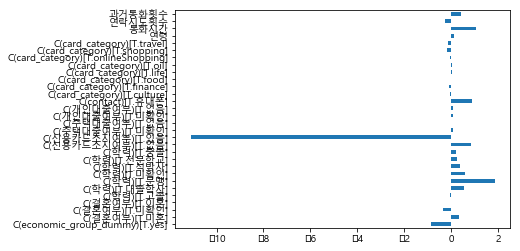

In [21]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]}, 
                                index = scaled_log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef", legend = False)

In [22]:
df_logistic_coef

,Coef
C(economic_group_dummy)[T.yes],-0.836923
C(결혼여부)[T.미혼],0.338614
C(결혼여부)[T.미확인],-0.349315
C(결혼여부)[T.이혼],-0.011602
C(학력)[T.고졸],-0.033627
C(학력)[T.대졸학사],0.563482
C(학력)[T.문맹],1.874129
C(학력)[T.미확인],0.587545
C(학력)[T.석박사],0.388920
C(학력)[T.전문학교],0.244250


In [23]:
df_logistic_coef.sort_values(["Coef"], ascending=True)

,Coef
C(신용카드소지여부)[T.있음],-11.104603
C(economic_group_dummy)[T.yes],-0.836923
C(결혼여부)[T.미확인],-0.349315
연락시도횟수,-0.259798
C(card_category)[T.shopping],-0.174205
C(card_category)[T.travel],-0.133365
C(card_category)[T.finance],-0.084326
C(card_category)[T.culture],-0.047757
C(학력)[T.고졸],-0.033627
C(card_category)[T.onlineShopping],-0.032241


# 그렇다면 신용카드 소지 여부를 제외하고 돌려본다.

In [24]:
# 분석 대상 이벤트 = "1"
# 카드 종류 제외하고 분석
scaled_log_model  = Logit.from_formula("""success ~ 연령 + C(economic_group_dummy) + C(결혼여부) + C(학력) +
                                    C(주택대출여부) + C(개인대출여부) + C(contact) + 통화시간 + 연락시도횟수 + 
                                     과거통화횟수 + C(card_category)""", df_scaled_train)

# 적합
scaled_log_result = scaled_log_model.fit()

# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.256689
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28803
Method:                           MLE   Df Model:                           27
Date:                Sat, 22 Feb 2020   Pseudo R-squ.:                  0.2701
Time:                        14:14:50   Log-Likelihood:                -7400.6
converged:                       True   LL-Null:                       -10139.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -3.0753      0.157    

C:\Users\jk000\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\jk000\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\jk000\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\jk000\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [25]:
# test 데이터 예측
scaled_y_pred = scaled_log_result.predict(df_scaled_test)
# 0과 1의 값을 가진 class 변환
scaled_y_pred_class = (scaled_y_pred > 0.5).astype(int)
scaled_y_pred_class.head()

# 실제 test 데이터의 목표변수와 test 데이터의 예측값 비교
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_scaled_test["success"], scaled_y_pred_class)))
print("Confustion Matrix: \n{}".format(confusion_matrix(df_scaled_test["success"], scaled_y_pred_class)))

Accuracy: 0.898

Confustion Matrix: 
[[10747   213]
 [ 1053   344]]


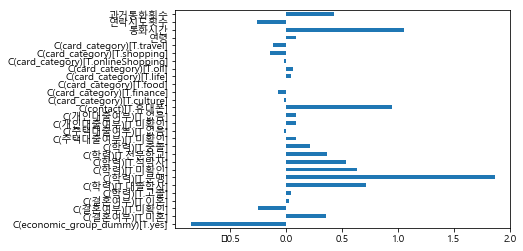

In [26]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]}, 
                                index = scaled_log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef", legend = False)

In [27]:
df_logistic_coef.sort_values(["Coef"], ascending=True)

,Coef
C(economic_group_dummy)[T.yes],-0.855728
연락시도횟수,-0.264986
C(결혼여부)[T.미확인],-0.251046
C(card_category)[T.shopping],-0.147946
C(card_category)[T.travel],-0.117467
C(card_category)[T.finance],-0.071722
C(주택대출여부)[T.없음],-0.023354
C(card_category)[T.culture],-0.022167
C(card_category)[T.onlineShopping],-0.016285
C(card_category)[T.food],-0.000808


### 카드 종류 제외한 후 로지스틱을 돌려보았다.
### 특별히 어떠한 부분이 영향력이 높다고 생각되지 않는다. (회귀 계수가 다 비슷비슷)
### 굳이 꼽자고 하면
### 1) 학력이 문맹일 수록 (1.866819)
### 2) 전화를 오래할 수록 (1.053534)
#### 이 정보는 크게 도움되어 보이지 않는다...

# Sklearn을 활용한 로지스틱 회귀

In [28]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [29]:
df_raw.head(1)

,연령,age_group,직업군,economic_group,economic_group_dummy,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,success,연락일자,카드종류,card_category
0,56,5,주부,0,no,결혼,중졸,없음,없음,없음,유선전화,261,1,NaN,0,no,0,2018-01-03,87,life


In [30]:
y = df_raw["success"]
df_X = df_raw.drop(["success", "age_group","economic_group","economic_group_dummy", "계약여부", "카드종류", "p_days", "연락일자"], axis =1)
X = pd.get_dummies(df_X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =11)
print(X_train.shape, X_test.shape)

(28831, 48) (12357, 48)


In [32]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
log_result = LogisticRegression().fit(X, y)

C:\Users\jk000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
log_result.coef_

array([[ 0.00525553,  0.00411092, -0.10395586,  0.83102429, -0.25985106,
        -0.34455731, -0.27999628,  0.09629793,  0.0115905 , -0.69733218,
        -0.48664006,  0.74356938, -0.18202564, -0.06621427,  0.39094838,
        -0.1345999 , -0.41679455, -0.19639449, -0.02136204, -0.57425943,
        -0.18299674, -0.38036694, -0.16333212,  0.01159292,  0.10618056,
        -0.17286836, -0.32801924, -0.0990006 , -1.06696716, -0.14026293,
        -0.00158043, -0.44177177, -0.30079548, -0.46624326, -0.54793217,
        -0.30079548, -0.36008286, -1.05510846, -0.15370205, -0.12030473,
        -0.11925469, -0.10560846, -0.12086052, -0.13727076, -0.15168016,
        -0.12788261, -0.24826357, -0.077685  ]])

In [35]:
# 변수명 저장
v_feature_name = X_train.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = log_result.coef_[0]
# feature_importances의 테이블 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = True, inplace = True)
df_importance.round(3)

,Feature,Importance
28,신용카드소지여부_미확인,-1.067
37,contact_유선전화,-1.055
9,직업군_산업노동자,-0.697
19,결혼여부_이혼,-0.574
34,개인대출여부_대출있음,-0.548
10,직업군_서비스종사자,-0.487
33,주택대출여부_없음,-0.466
31,주택대출여부_대출있음,-0.442
16,결혼여부_결혼,-0.417
21,학력_고졸,-0.380


Text(0, 0.5, '설명변수')

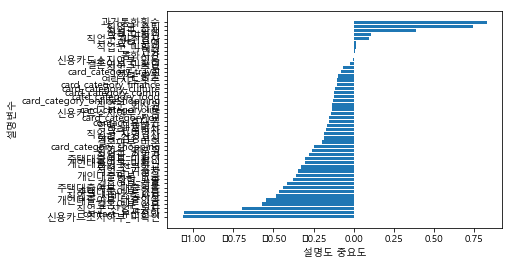

In [36]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명도 중요도")
plt.ylabel("설명변수")

Text(0, 0.5, '설명변수')

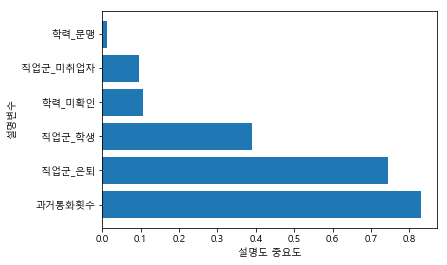

In [37]:
df_importance.sort_values("Importance", ascending = False, inplace = True)
coordinates = range(6)
plt.barh(y = coordinates, width = df_importance["Importance"][:6])
plt.yticks(coordinates, df_importance["Feature"][:6])
plt.xlabel("설명도 중요도")
plt.ylabel("설명변수")

In [38]:
df_importance["Importance"][:6]

3     0.831024
11    0.743569
14    0.390948
24    0.106181
7     0.096298
23    0.011593
Name: Importance, dtype: float64

Text(0, 0.5, '설명변수')

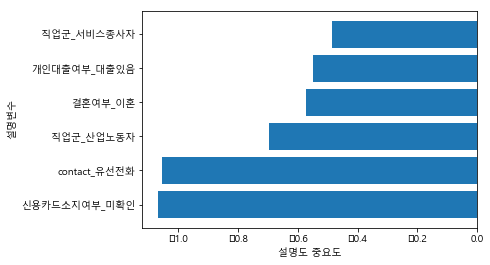

In [39]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(6)
plt.barh(y = coordinates, width = df_importance["Importance"][:6])
plt.yticks(coordinates, df_importance["Feature"][:6])
plt.xlabel("설명도 중요도")
plt.ylabel("설명변수")

In [40]:
df_importance["Importance"][:6]

28   -1.066967
37   -1.055108
9    -0.697332
19   -0.574259
34   -0.547932
10   -0.486640
Name: Importance, dtype: float64

### 카드 종류 포함을 해서 로지스틱 회귀분석을 돌려보았다.
### 영향력이 +인 요소
### 1) 과거통화 횟수(0.831024)
### 2) 직업군_은퇴 (0.743569)
### 3) 직업군_학생 (0.390948)
### 영향력이 -인 요소
### 1) 신용카드소지여부_미확인(1.066967)
### 2) contact_유선전화 (-1.055108)

In [41]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
log_result = LogisticRegression()

# fit the model with data
log_result.fit(X_train,y_train)

#
y_pred=log_result.predict(X_test)

C:\Users\jk000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10741,   217],
       [ 1055,   344]], dtype=int64)

In [43]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

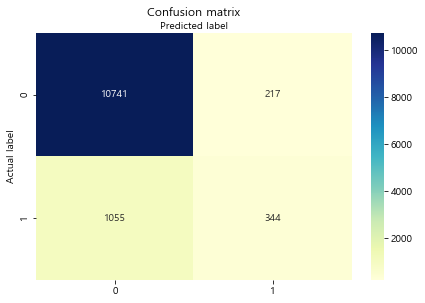

In [44]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8970623937848993
Precision: 0.6131907308377896
Recall: 0.24588992137240887


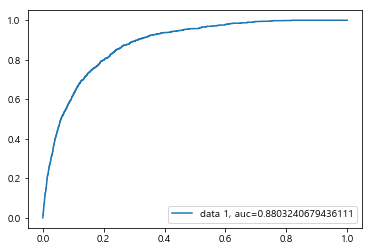

In [46]:
y_pred_proba = log_result.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [47]:
log_result.coef_

array([[ 0.00390028,  0.00405171, -0.09770644,  0.86116057, -0.23397005,
        -0.29183289, -0.25551814,  0.07289593,  0.01305142, -0.73363024,
        -0.49255941,  0.72284835, -0.1938266 , -0.03241371,  0.34395559,
        -0.11880923, -0.42225529, -0.22107876, -0.0201677 , -0.53630723,
        -0.09202302, -0.40493646, -0.1869655 ,  0.00714801,  0.08065537,
        -0.156218  , -0.35833569, -0.08913369, -1.08716681, -0.11151196,
        -0.00113021, -0.46115066, -0.30074849, -0.43790983, -0.54936653,
        -0.30074849, -0.34969396, -1.09069753, -0.10911145, -0.06728017,
        -0.17677923, -0.13605462, -0.0964457 , -0.11741135, -0.13030311,
        -0.09648707, -0.27133865, -0.10770907]])

In [48]:
 # Set values of the grid search
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
C_grid = {'C': C_values}
# Set the amount of folds for the cross-validation
n_folds = 5
# Do a model fit over a grid of C hyperparameters
logReg = LogisticRegression(penalty='l2', random_state=7)
grid_logReg = GridSearchCV(logReg, C_grid, cv=n_folds, refit=True)
grid_logReg.fit(X_train,y_train)

C:\Users\jk000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jk000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\jk000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jk000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\jk000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jk000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=7, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [49]:
LGR = LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=7, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)

In [50]:
LGR.fit(X_train,y_train)

C:\Users\jk000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
LGR.score(X,y)

0.8979071574244926

In [52]:
f1_score(y_test, y_pred)

0.35102040816326535